Import Dependency 

In [0]:
# Data formatting
import pandas as pd
import pandas_datareader as pdr
from pandas import Series, DataFrame

# Plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

#import seaborn as sns
#sns.set()

import fix_yahoo_finance as yf

import datetime


Collecting Data

In [0]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 6, 6)

df = pdr.DataReader("MSFT", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-31,124.620003,123.320000,124.230003,123.680000,26646800.0,123.269516
2019-06-03,124.370003,119.010002,123.849998,119.839996,37983600.0,119.442261
2019-06-04,123.279999,120.650002,121.279999,123.160004,29382600.0,122.751244
2019-06-05,125.870003,124.209999,124.949997,125.830002,24926100.0,125.412384
2019-06-06,127.970001,125.599998,126.440002,127.820000,21459000.0,127.395775


Moving Avearge 

In [0]:
close_px = df['Adj Close']
mavg = close_px.rolling(50).mean().shift()
mavg[-10:]

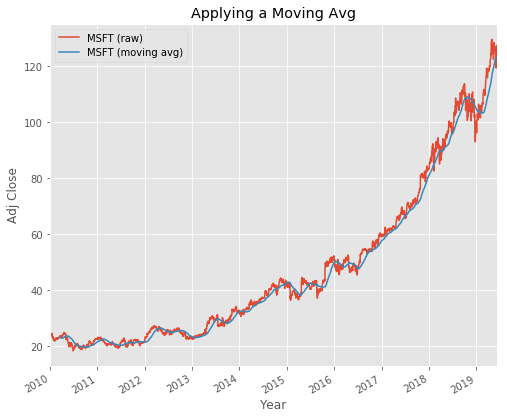

In [0]:
mpl.rc('figure', figsize=(8, 7))
style.use('ggplot')

close_px.plot(label='MSFT (raw)', title='Applying a Moving Avg')
mavg.plot(label='MSFT (moving avg)')

plt.xlabel('Year')
plt.ylabel('Adj Close')
plt.legend()

Linear Regression

In [0]:
dfreg = df.loc[:,['Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.columns


Index(['Close', 'Volume', 'HL_PCT', 'PCT_change'], dtype='object')

In [0]:
# Matrix math data pre-processing
import math
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# separate 5 percent of the data to forecast
test_split_index = int(math.ceil(0.1 * len(dfreg)))

# set the label to AdjClose
dfreg['label'] = dfreg['Close'].shift(-100)

# Drop missing values
dfreg.dropna(inplace=True)

X = np.array(dfreg.drop(['label'], 1))
test_split_index

218

In [0]:
# Scale X
X = preprocessing.scale(X)


# Split data for training, testing
X_test = X[-test_split_index:]
X = X[:-test_split_index]

y = np.array(dfreg['label'])
y_test = y[-test_split_index:]
y = y[:-test_split_index]

In [0]:
# Linear regression
clf_reg = LinearRegression(n_jobs=-1)
clf_reg.fit(X, y)
clf_reg.score(X_test, y_test)

0.2934052986207371

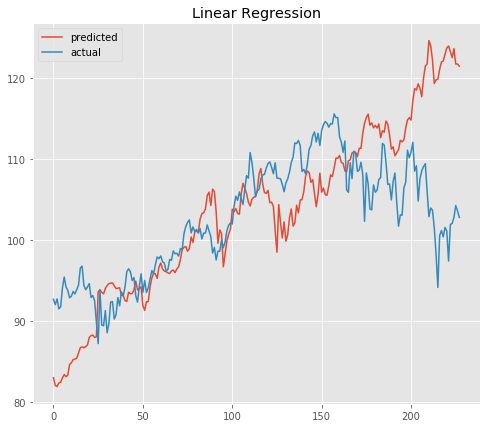

In [0]:
plt.plot(clf_reg.predict(X_test), label='predicted')
plt.plot(y_test, label='actual')
plt.title('Linear Regression')

plt.legend()

Support Vector Regression

In [0]:
from sklearn.svm import SVR
clf_svr = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf_svr.fit(X, y) 
clf_svr.score(X_test, y_test)

-13.823163985026701

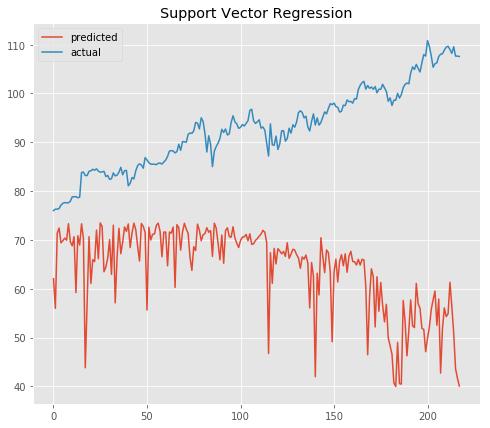

In [0]:
plt.plot(clf_svr.predict(X_test), label='predicted')
plt.plot(y_test, label='actual')
plt.title('Support Vector Regression')

plt.legend()

Raddon Forest Regression

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, max_leaf_nodes=20)
rf_reg.fit(X, y) 

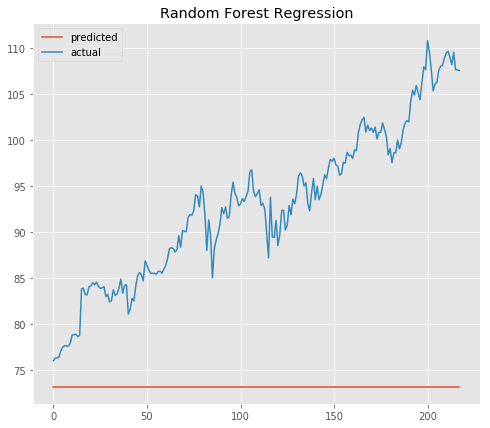

In [0]:
plt.plot(rf_reg.predict(X_test), label='predicted')
plt.plot(y_test, label='actual')
plt.title('Random Forest Regression')

plt.legend()

Elastic Net

In [0]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet().fit(X, y)
reg.score(X, y) 

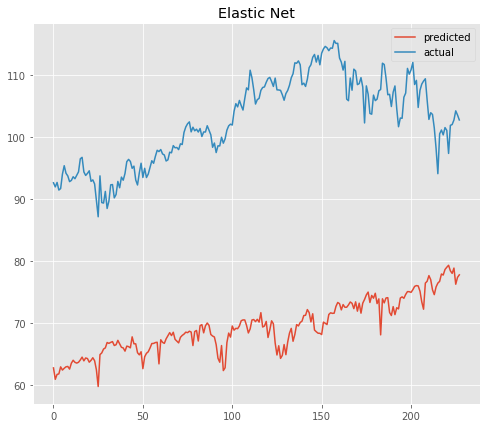

In [0]:
plt.plot(reg.predict(X_test), label='predicted')
plt.plot(y_test, label='actual')
plt.title('Elastic Net')

plt.legend()